In [1]:
import mxnet as mx
from mxnet import nd,viz
from mxnet.gluon import nn,model_zoo

In [2]:
vgg11 = model_zoo.vision.vgg11(pretrained=True)


In [3]:
print(vgg11)

VGG(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Activation(relu)
    (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (3): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Activation(relu)
    (5): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (6): Conv2D(128 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Activation(relu)
    (8): Conv2D(256 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Activation(relu)
    (10): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (11): Conv2D(256 -> 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): Activation(relu)
    (13): Conv2D(512 -> 512, kernel_size=(3, 3), stride=(1

In [4]:
vgg11.summary(nd.ones((1,3,224,224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 64, 224, 224)            1792
        Activation-2                           (1, 64, 224, 224)               0
         MaxPool2D-3                           (1, 64, 112, 112)               0
            Conv2D-4                          (1, 128, 112, 112)           73856
        Activation-5                          (1, 128, 112, 112)               0
         MaxPool2D-6                            (1, 128, 56, 56)               0
            Conv2D-7                            (1, 256, 56, 56)          295168
        Activation-8                            (1, 256, 56, 56)               0
            Conv2D-9                            (1, 256, 56, 56)          590080
       Activation-10        

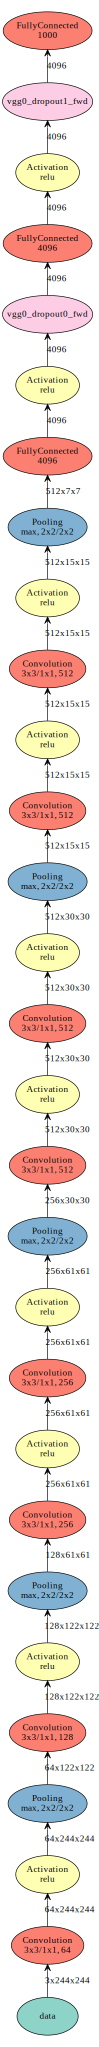

In [6]:
viz.plot_network(vgg11(mx.sym.var('data')),shape={'data':(1,3,244,244)},node_attrs={'shape':'oval','fixedsize':'false'})

In [7]:
mobile_net = model_zoo.vision.mobilenet_v2_1_0(pretrained=True)

In [8]:
mobile_net

MobileNetV2(
  (features): HybridSequential(
    (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
    (2): RELU6(
    
    )
    (3): LinearBottleneck(
      (out): HybridSequential(
        (0): Conv2D(32 -> 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (2): RELU6(
        
        )
        (3): Conv2D(1 -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (5): RELU6(
        
        )
        (6): Conv2D(32 -> 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=16)

In [11]:
mobile_net.summary(nd.ones((1,3,224,224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 32, 112, 112)             864
         BatchNorm-2                           (1, 32, 112, 112)             128
             RELU6-3                           (1, 32, 112, 112)               0
            Conv2D-4                           (1, 32, 112, 112)            1024
         BatchNorm-5                           (1, 32, 112, 112)             128
             RELU6-6                           (1, 32, 112, 112)               0
            Conv2D-7                           (1, 32, 112, 112)             288
         BatchNorm-8                           (1, 32, 112, 112)             128
             RELU6-9                           (1, 32, 112, 112)               0
           Conv2D-10        

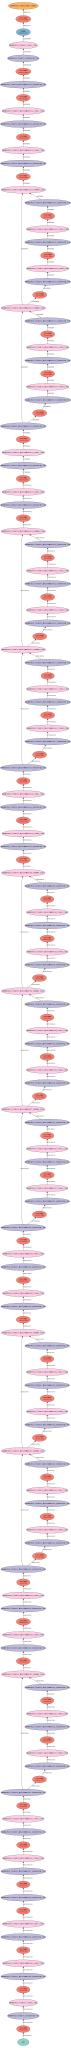

In [12]:
viz.plot_network(mobile_net(mx.sym.var('data')),shape={'data':(1,3,244,244)},node_attrs={'shape':'oval','fixedsize':'false'})

In [14]:
mobile_net.hybridize()
mobile_net(nd.ones((1,3,224,224)))
mobile_net.export('mobile_net')

# Exit